# **Comprobació de les dades**


1- **Dataset_to_Check_qc.csv** - Puntuacions dels controls de qualitat de la segmentació (paràmetre qc mri_SynthSeg que indica l'index de confiança en la segmentació), per norma general valors inferiors a 0.65 es consideren dolents

2- **Dataset_to_Check_vol.csv** - Volumns deles regions cerebrals retornades per mri_SynthSeg

Aquest script analitza les dades i identifica outliers tant per què fa a puntuacions de control de qualitat com a dades volumètriques


## **PAS1: importar llibreries**

In [1]:
# numpy i Pandas per manipular dades
import numpy as np
import pandas as pd
# per visualitzar dades
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
# enllaça a drive
from google.colab import drive

## **PAS2: enllaçar amb drive**

In [2]:
#paths relatius a l'arxiu ipynb
import glob
# recuperar ruta de l0scritp
script_name = '2_QC_Dataset_Treball.ipynb'
drive.mount(os.getcwd() + '/drive')
script_path = glob.glob(os.getcwd() + '/**/' + script_name, recursive = True)
print(script_path)
head_tail = os.path.split(script_path[0])
# guardem carpeta de treball
work_path = head_tail[0];

Mounted at /content/drive
['/content/drive/MyDrive/TFM/Finals/2_QC_Dataset_Treball.ipynb']


## **PAS3: llegir arxius**

In [3]:
#llegir CSVs
# path dels arxius combinats
merged_qc_path = work_path + '/CSV/Dataset_to_Check_qc.csv'
merged_v_path = work_path + '/CSV/Dataset_to_Check_vol.csv'

# Lectures
matched_qc_df = pd.read_csv(merged_qc_path, encoding='latin-1')
matched_v_df = pd.read_csv(merged_v_path, encoding='latin-1')

In [4]:
# canvi num per descripció a la columna DX_GROUP
matched_qc_df['DX_GROUP'] = matched_qc_df['DX_GROUP'].replace({1: 'TEA', 2: 'CONTROL'})
matched_v_df['DX_GROUP'] = matched_v_df['DX_GROUP'].replace({1: 'TEA', 2: 'CONTROL'})
#visualització
matched_qc_df['DX_GROUP'].info()
matched_v_df['DX_GROUP'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 370 entries, 0 to 369
Series name: DX_GROUP
Non-Null Count  Dtype 
--------------  ----- 
370 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 370 entries, 0 to 369
Series name: DX_GROUP
Non-Null Count  Dtype 
--------------  ----- 
370 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


In [5]:
# path imatges
img_base = work_path + '/Imatges/'
if not os.path.exists(img_base):
    os.makedirs(img_base)
img_path = work_path + '/Imatges/QC/'
# crear carpeta si no existeix
if not os.path.exists(img_path):
    os.makedirs(img_path)

## **PAS4: Informació Gràfica**

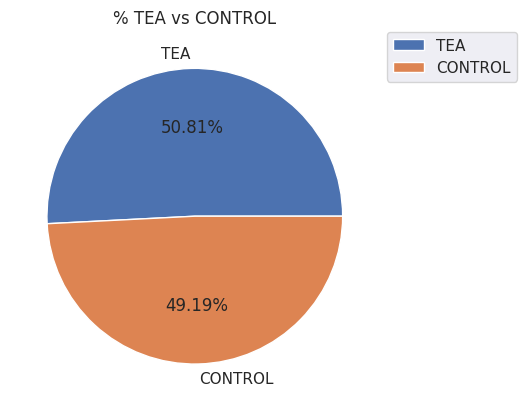

In [6]:
# Distribució de TEA vs ASD (la distribució és identica per l'arxiu amb les puntuacions de control de qualitat i amb el dels volums)
ax = matched_qc_df['DX_GROUP'].value_counts().plot.pie(autopct='%.2f%%', ylabel ="" , title="% TEA vs CONTROL", legend=True)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.savefig(img_path + 'Pie_TEA_vs_Control.png')
plt.show()

La proporció inicial és força equilibrada

In [7]:
# extreure Labs
labs = matched_qc_df['SITE_ID'].unique()
labs

array(['ABIDEII-BNI_1', 'ABIDEII-ETH_1', 'ABIDEII-IP_1', 'ABIDEII-KUL_3',
       'ABIDEII-OILH_2', 'ABIDEII-SDSU_1', 'ABIDEII-TCD_1',
       'ABIDEII-UCD_1'], dtype=object)

In [8]:
#eliminar columnna unnamed
matched_qc_df.drop(matched_qc_df.columns[matched_qc_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
# variables qc
matched_qc_df.columns

Index(['SITE_ID', 'SUB_ID', 'DX_GROUP', 'AGE_AT_SCAN ', 'SEX', 'FIQ',
       'subject', 'general white matter', 'general grey matter', 'general csf',
       'cerebellum', 'brainstem', 'thalamus', 'putamen+pallidum',
       'hippocampus+amygdala'],
      dtype='object')

In [9]:
#eliminar columnna unnamed
matched_v_df.drop(matched_v_df.columns[matched_v_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
# variables volum
matched_v_df.columns

Index(['SITE_ID', 'SUB_ID', 'DX_GROUP', 'AGE_AT_SCAN ', 'SEX', 'FIQ',
       'subject', 'total intracranial', 'left cerebral white matter',
       'left cerebral cortex', 'left lateral ventricle',
       'left inferior lateral ventricle', 'left cerebellum white matter',
       'left cerebellum cortex', 'left thalamus', 'left caudate',
       'left putamen', 'left pallidum', '3rd ventricle', '4th ventricle',
       'brain-stem', 'left hippocampus', 'left amygdala', 'csf',
       'left accumbens area', 'left ventral DC', 'right cerebral white matter',
       'right cerebral cortex', 'right lateral ventricle',
       'right inferior lateral ventricle', 'right cerebellum white matter',
       'right cerebellum cortex', 'right thalamus', 'right caudate',
       'right putamen', 'right pallidum', 'right hippocampus',
       'right amygdala', 'right accumbens area', 'right ventral DC'],
      dtype='object')

## **PAS5: Anàlisis Resultats**

### QC

<Figure size 2000x10000 with 0 Axes>

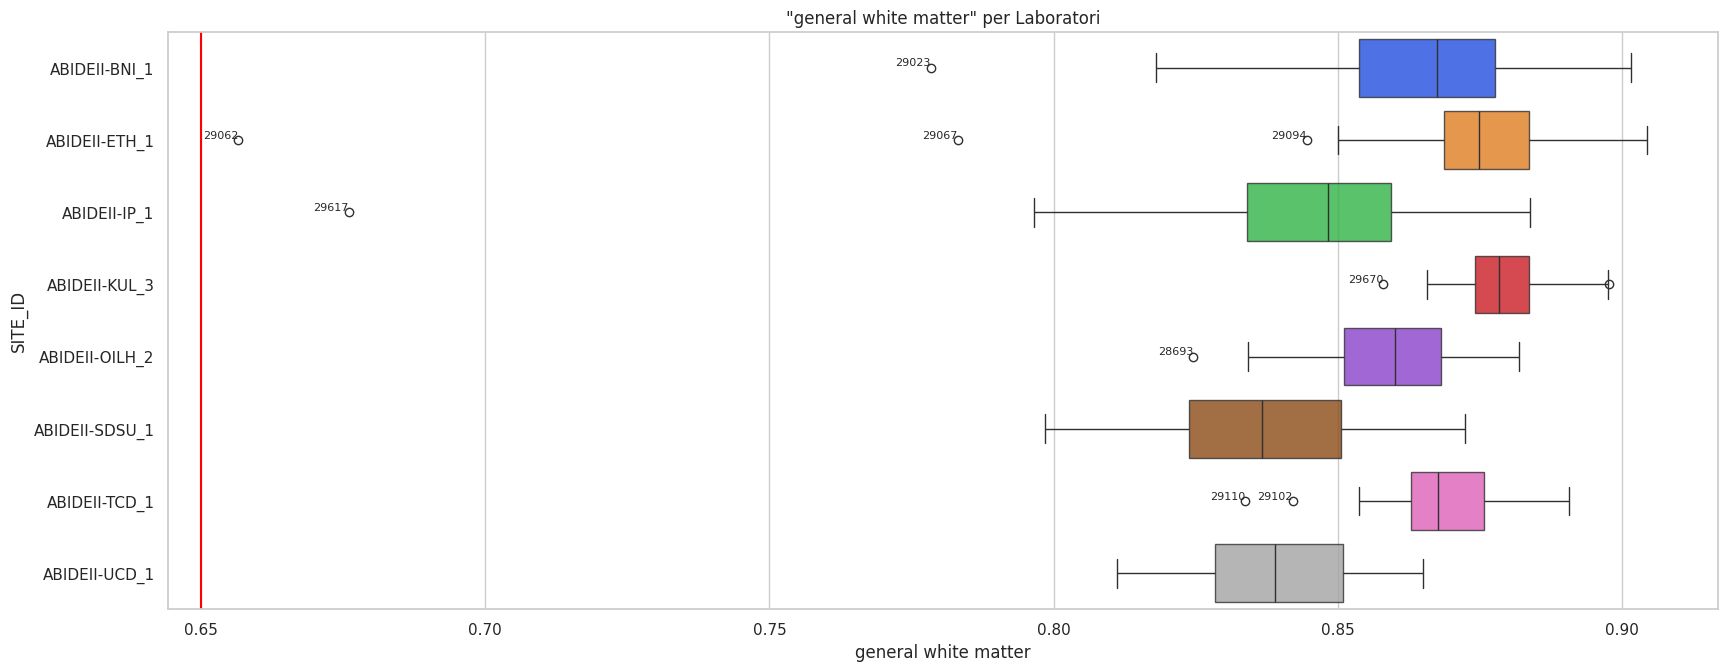

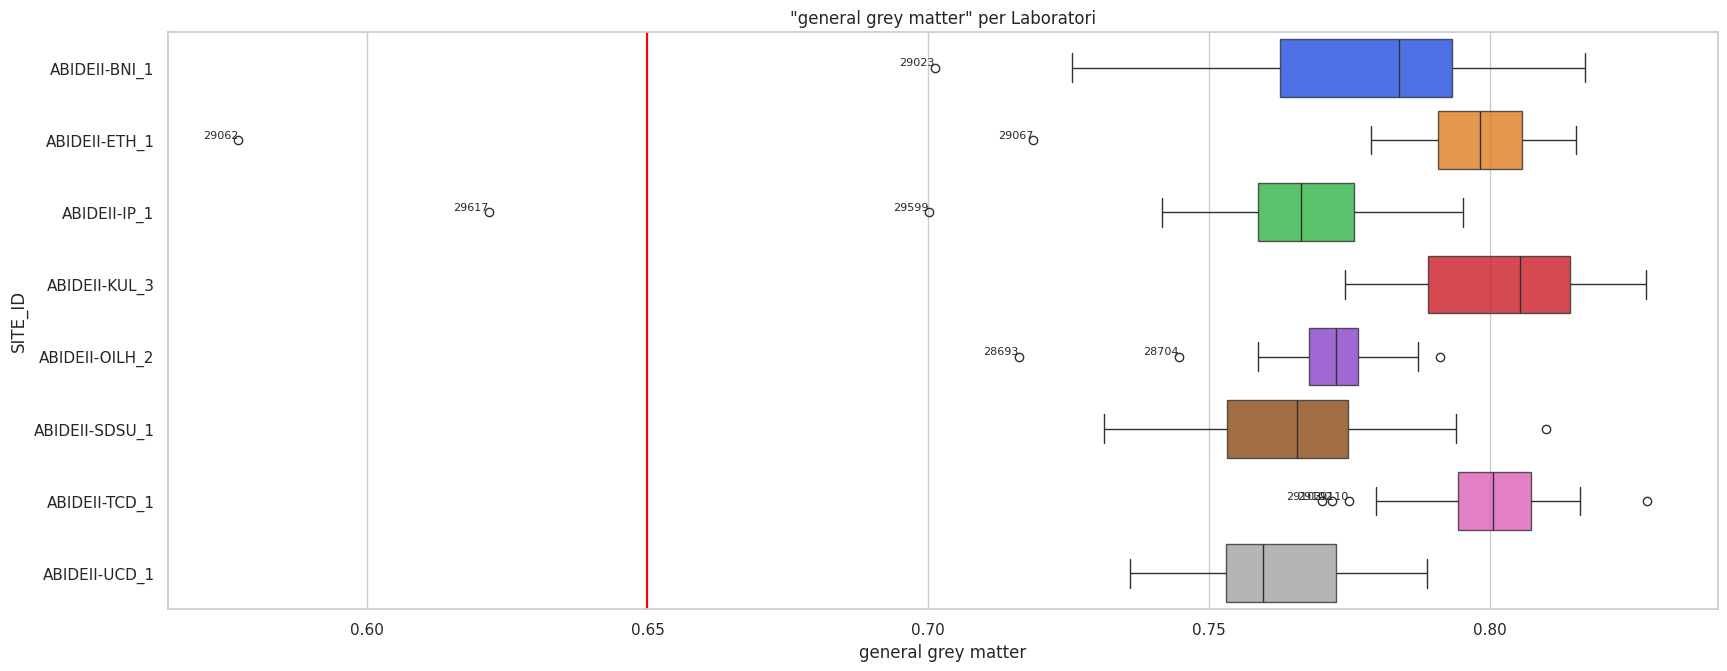

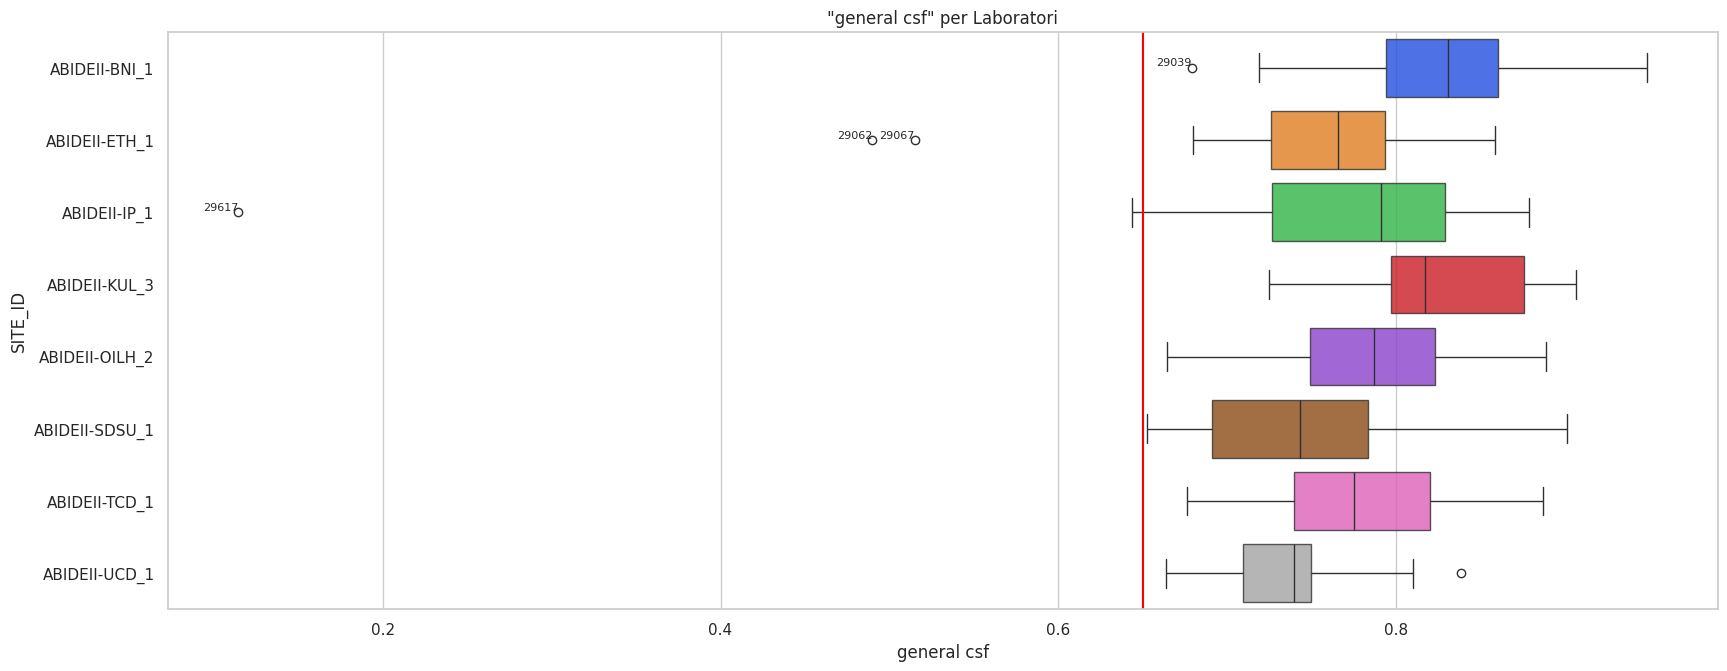

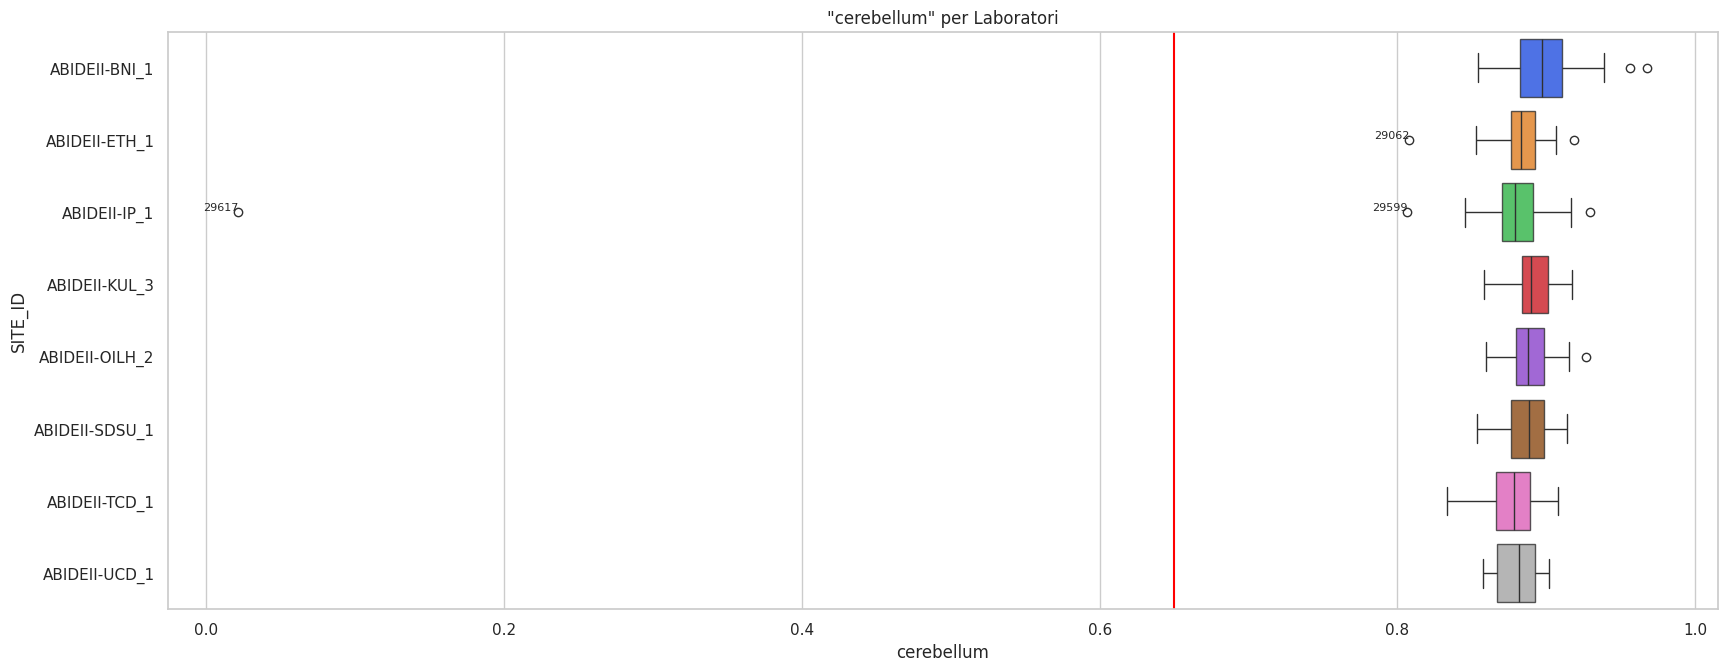

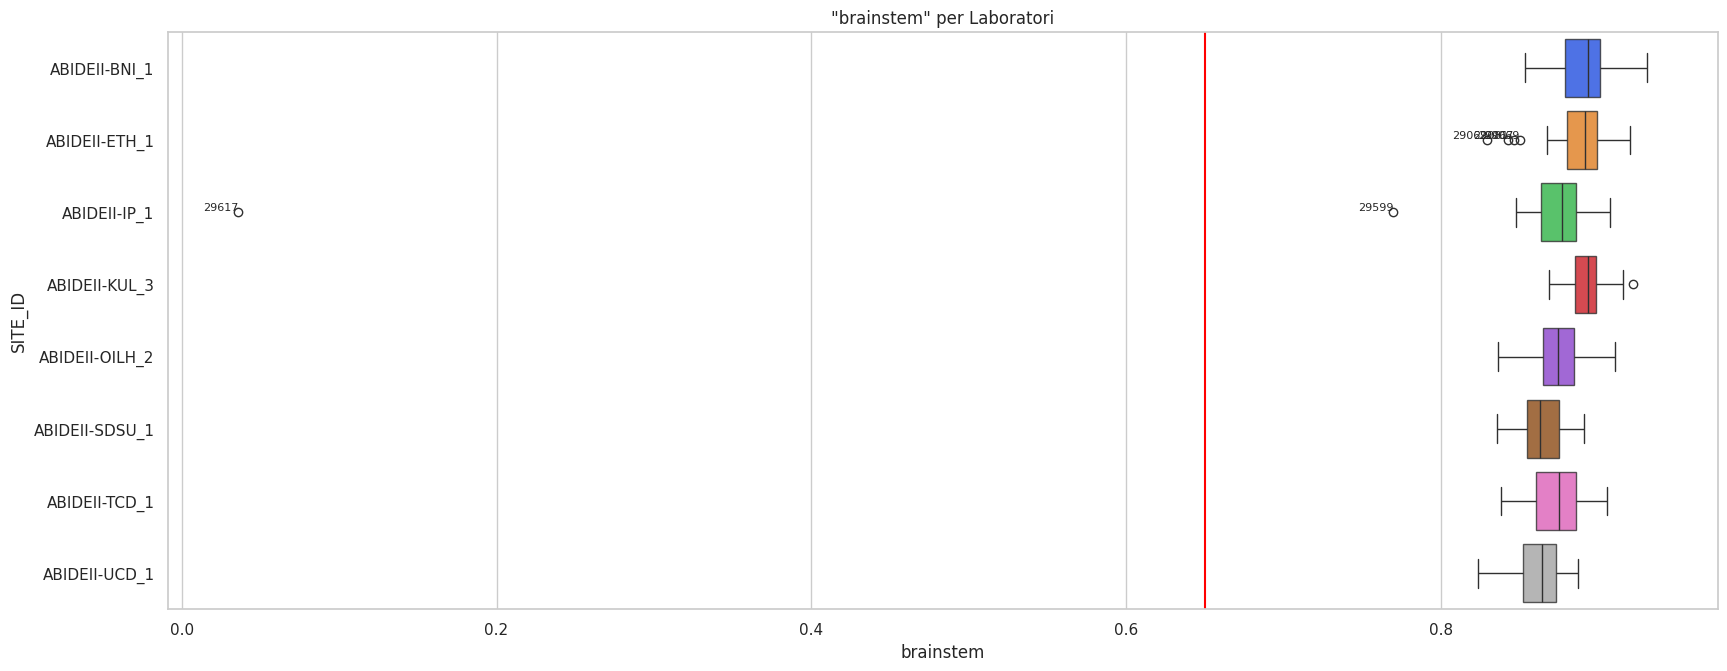

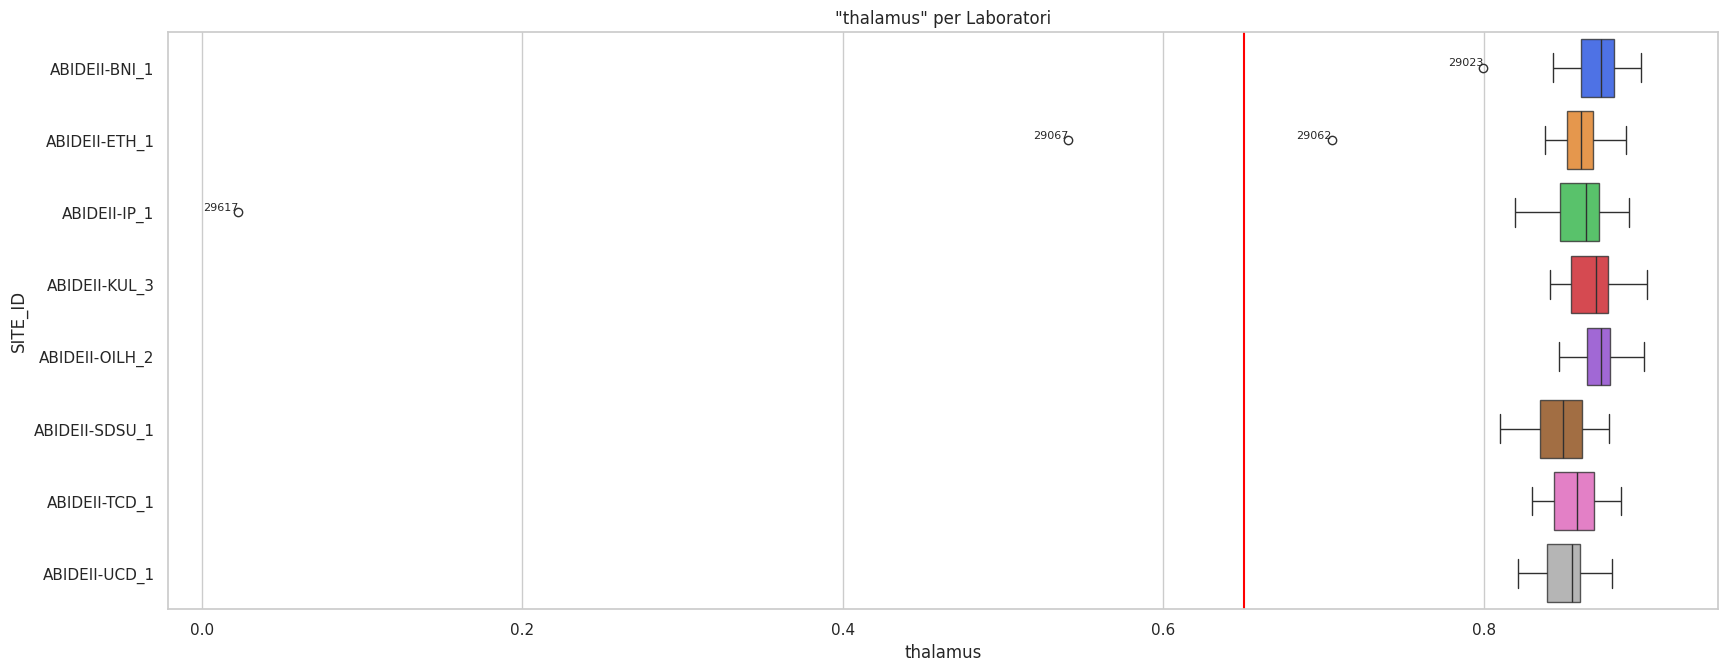

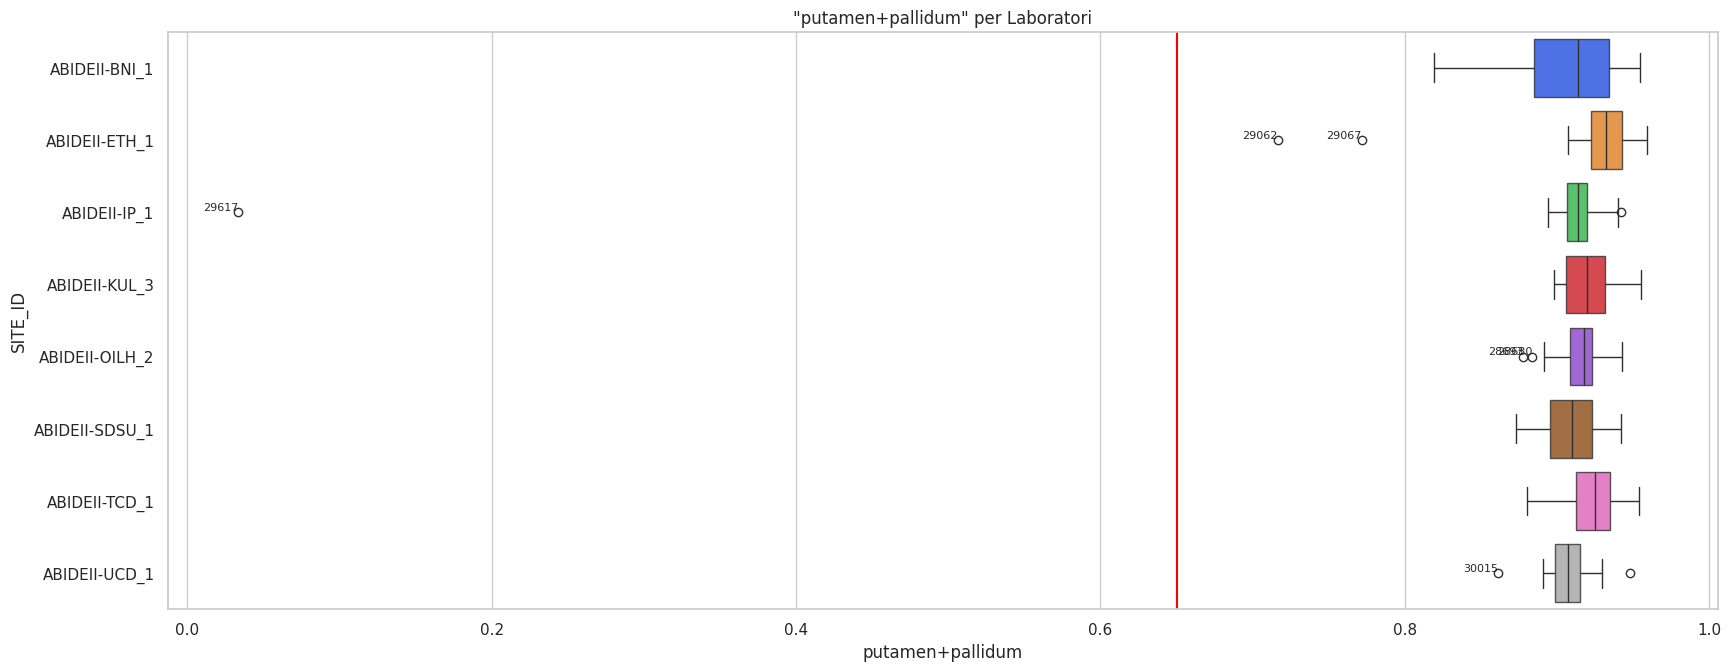

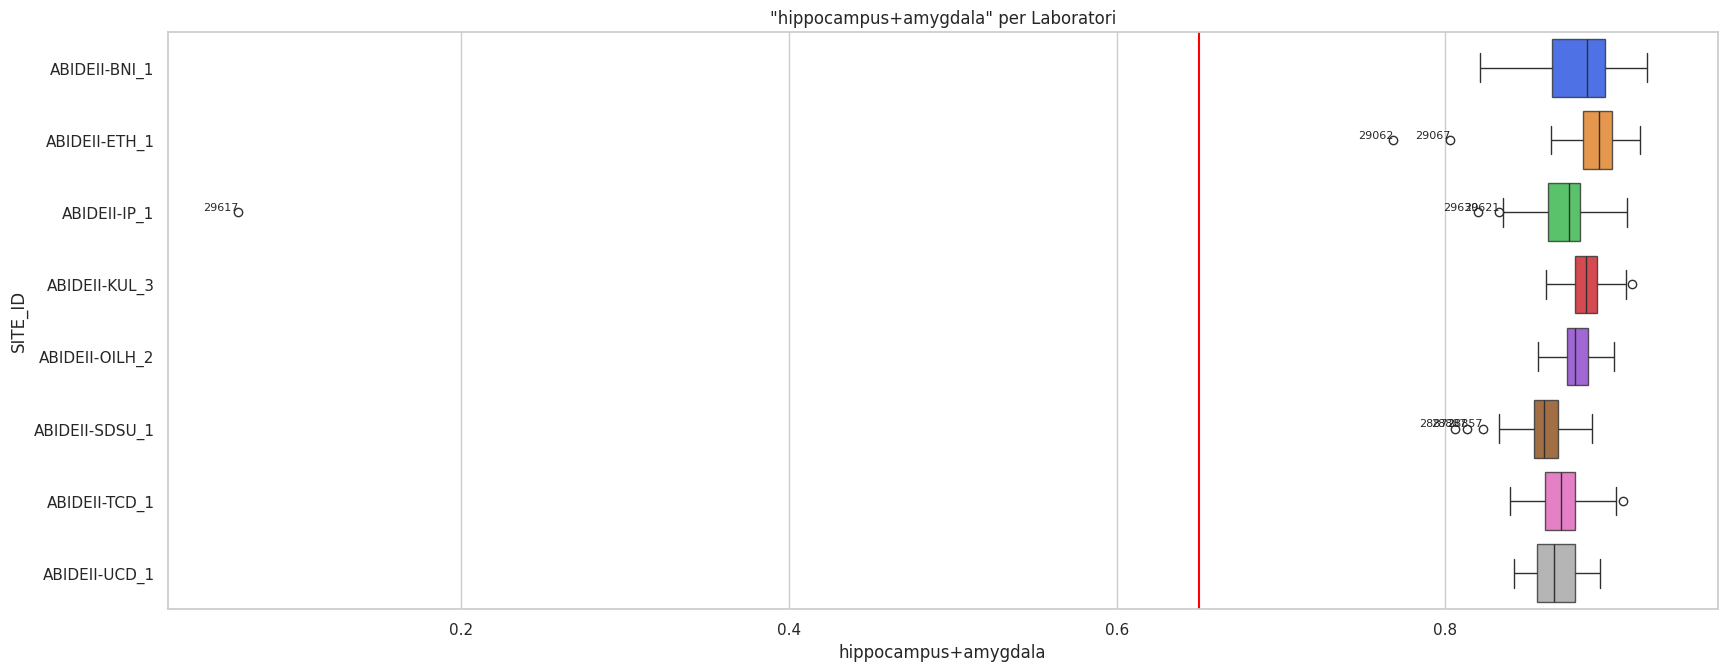

[29062, 29617, 29067]

[29062, 29617, 29023, 29067, 29599, 28693, 28704, 29039]


In [10]:
# control de qualitat per laboratori
plt.figure(figsize = (20,100))
sns.set_style("whitegrid")
j = 0
nok = []
check = []
for i in list(matched_qc_df.iloc[:, 7:15].columns):
    plt.figure(figsize = (20,7.5))
    ax = sns.boxplot(y='SITE_ID', x=str(i), data=pd.concat([matched_qc_df, matched_qc_df.DX_GROUP], axis=1),
                    palette='bright', hue='SITE_ID', boxprops=dict(alpha=0.8))
    plt.title(f'"{i}" per Laboratori')

    ax.axvline(x= 0.65, color="red")

    # identificar outliers
    for lab in matched_qc_df['SITE_ID'].unique():
        cat_df = matched_qc_df[matched_qc_df['SITE_ID'] ==  lab]
        var = str(i)
        #print (var)

        q1 = cat_df[var].quantile(0.25)
        q3 = cat_df[var].quantile(0.75)
        iqr = q3-q1
        LL = q1 - 1.5 * iqr
        HL = q3 + 1.5 * iqr

        outliers = cat_df[(cat_df[var] < LL)]

        # anotar outliers
        for _,row in outliers.iterrows():
            plt.text(y=list(matched_qc_df['SITE_ID'].unique()).index(lab), x=row[var], s=row['SUB_ID'], ha='right', va='bottom', fontsize=8)
            if row[var] <= 0.65 and row['SUB_ID'] not in nok:
                nok.append(row['SUB_ID'])
            else:
                if row[var] <= 0.75 and row['SUB_ID'] not in check:
                    check.append(row['SUB_ID'])


    plt.savefig(img_path + 'BoxPlot_qc_outliers_' + str(i) + '.png')
    plt.show()

print (nok)
print()
print (check)

### VOLUMS

In [11]:
# Normalitzar volums en base a ICV
df_volumns = matched_v_df.copy(deep=True)
# calcular proporcions
for i in list(matched_v_df.iloc[:, 8:].columns):
    df_volumns[str(i)] = (matched_v_df[str(i)] / matched_v_df['total intracranial']) * 100.0

In [12]:
df_volumns.head()

,SITE_ID,SUB_ID,DX_GROUP,AGE_AT_SCAN,SEX,FIQ,subject,total intracranial,left cerebral white matter,left cerebral cortex,...,right cerebellum white matter,right cerebellum cortex,right thalamus,right caudate,right putamen,right pallidum,right hippocampus,right amygdala,right accumbens area,right ventral DC
0,ABIDEII-BNI_1,29006,TEA,48.0,1,131.0,29006_anat,1757710.2,14.784765,15.261573,...,1.089906,2.939038,0.424380,0.223729,0.352040,0.106673,0.267572,0.110680,0.041119,0.242277
1,ABIDEII-BNI_1,29007,TEA,41.0,1,110.0,29007_anat,1887349.1,15.257460,15.840690,...,1.087734,3.073385,0.471656,0.343054,0.389906,0.107850,0.254075,0.117618,0.043610,0.288649
2,ABIDEII-BNI_1,29008,TEA,59.0,1,117.0,29008_anat,1520280.5,14.861496,15.134776,...,1.241448,3.394669,0.399780,0.238674,0.333826,0.097411,0.261384,0.124418,0.043208,0.249115
3,ABIDEII-BNI_1,29009,TEA,57.0,1,114.0,29009_anat,1608100.8,14.166619,14.827113,...,1.074929,3.186607,0.413606,0.232941,0.378395,0.106232,0.276249,0.121173,0.042534,0.247182
4,ABIDEII-BNI_1,29010,TEA,45.0,1,109.0,29010_anat,1632847.5,14.660135,15.562042,...,1.054956,3.240236,0.401592,0.280183,0.317051,0.107868,0.255013,0.112708,0.046548,0.266437


<Figure size 1500x10000 with 0 Axes>

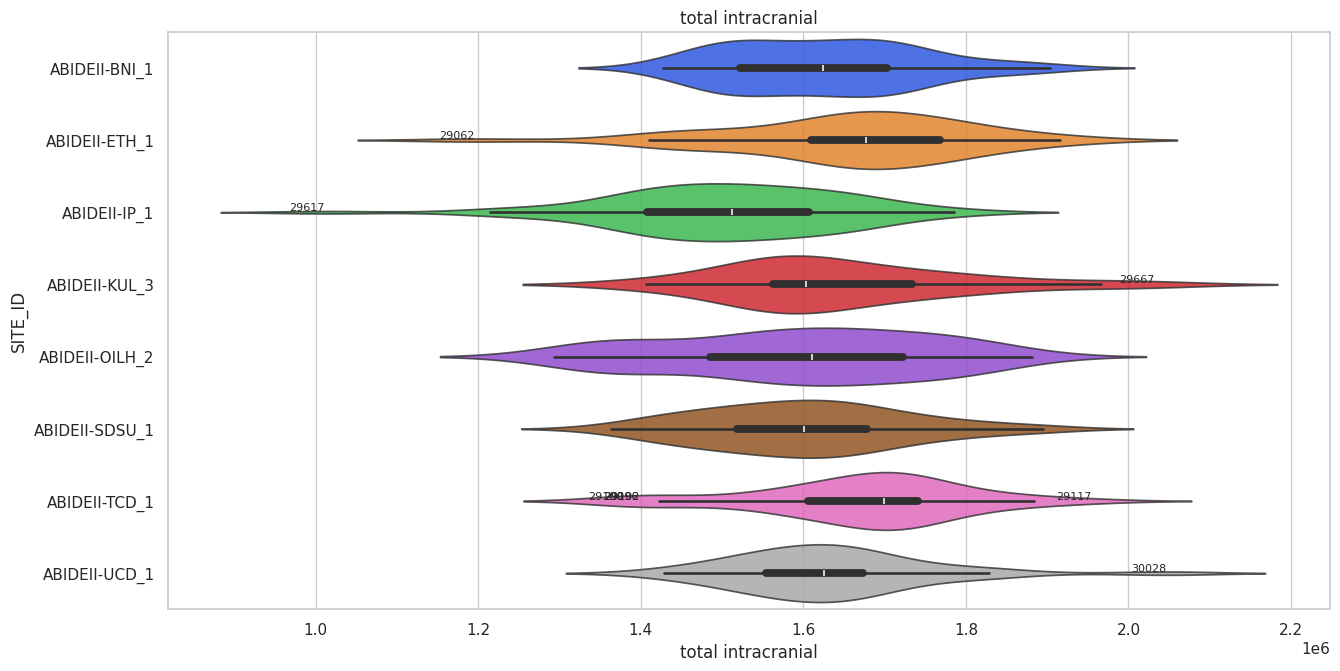

[29062, 29617, 29667, 29096, 29100, 29102, 29117, 30028]


In [13]:
plt.figure(figsize = (15,100))
sns.set_style("whitegrid")
plt.figure(figsize = (15,7.5))
outlier = []

sns.violinplot(y='SITE_ID', x='total intracranial', data=pd.concat([matched_v_df, matched_v_df.DX_GROUP], axis=1),
                    palette='bright', hue='SITE_ID', alpha=0.8)

plt.title('total intracranial')
# identificar outliers
for lab in matched_v_df['SITE_ID'].unique():
    cat_df = matched_v_df[matched_v_df['SITE_ID'] ==  lab]
    var = str(i)

    q1 = cat_df['total intracranial'].quantile(0.25)
    q3 = cat_df['total intracranial'].quantile(0.75)
    iqr = q3-q1
    LL = q1 - 1.5 * iqr
    HL = q3 + 1.5 * iqr

    outliers = cat_df[(cat_df['total intracranial'] < LL) | (cat_df['total intracranial'] > HL)]

    # anotar outliers
    for _,row in outliers.iterrows():
        plt.text(y=list(matched_v_df['SITE_ID'].unique()).index(lab), x=row['total intracranial'], s=row['SUB_ID'], ha='right', va='bottom', fontsize=8)
        if row['SUB_ID'] not in outlier:
            outlier.append(row['SUB_ID'])



plt.savefig(img_path + 'Violin_ICV_H.png')
plt.show()
print(outlier)

## **PAS6: Generar CSV de Treball**

CSV amb les dades volumètriques escalades i eliminant els valors anòmals detectats 29062,29067 i 29617

In [14]:
df_volumns.shape

(370, 40)

In [15]:
#eliminar volums
volums_finals = df_volumns.query("SUB_ID not in [29062, 29067, 29617]")
# comprobar que s'hagin eliminat
volums_finals.shape

(367, 40)

In [16]:
#path arxiu final
final_csv_path = work_path + '/CSV/Volums.csv'
#guardar CSV
volums_finals.to_csv(final_csv_path)
